In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
from keras.models import load_model
import math
from keras import backend as K

In [2]:
models = []
for i in range(1,12):
    models.append(load_model("Testing_Hyper_paramters_"+str(i)+".h5"))

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [4]:
df = pd.read_csv("../data/MSFT_complete.csv", parse_dates = True, index_col = 'Date')
del df['Unnamed: 0']
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-09-21,25.110001,25.370001,25.100000,25.299999,19.717058,28878700
2009-09-22,25.400000,25.820000,25.290001,25.770000,20.083347,61376700
2009-09-23,25.920000,26.250000,25.639999,25.709999,20.036585,60599900
2009-09-24,25.920000,26.110001,25.660000,25.940001,20.215834,56302900
2009-09-25,25.690001,25.820000,25.520000,25.549999,19.911896,50158900
...,...,...,...,...,...,...
2020-05-24,183.190002,184.460007,182.539993,183.509995,183.509995,20826900
2020-05-25,183.190002,184.460007,182.539993,183.509995,183.509995,20826900
2020-05-26,186.339996,186.500000,181.100006,181.570007,181.570007,36073600


In [5]:
df.drop(columns=['Volume','Adj Close'],inplace=True)
df.columns = [['open', 'high', 'low','close',]]
df

,open,high,low,close
Date,,,,
2009-09-21,25.110001,25.370001,25.100000,25.299999
2009-09-22,25.400000,25.820000,25.290001,25.770000
2009-09-23,25.920000,26.250000,25.639999,25.709999
2009-09-24,25.920000,26.110001,25.660000,25.940001
2009-09-25,25.690001,25.820000,25.520000,25.549999
...,...,...,...,...
2020-05-24,183.190002,184.460007,182.539993,183.509995
2020-05-25,183.190002,184.460007,182.539993,183.509995
2020-05-26,186.339996,186.500000,181.100006,181.570007


In [6]:
train_ind = int(0.6*len(df))
val_ind = train_ind + int(0.2*len(df))
lookback = 60
n_features = 4


In [7]:
data = sc.fit_transform(df)
test = data[val_ind:]

In [8]:
xtest,ytest = test[:,:4],test[:,3]
test_len = len(xtest) - lookback

In [9]:
x_test = np.zeros((test_len, lookback, n_features))
y_test = np.zeros((test_len))
for i in range(test_len):
    ytemp = i+lookback
    x_test[i] = xtest[i:ytemp]
    y_test[i] = ytest[ytemp]
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_test (722, 60, 4)
y_test (722,)


In [10]:
for i in range(len(models)):
    print("Model - "+str(i+1))
    print(models[i].summary())
    print("\n")
    

Model - 1
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 60, 120)           60000     
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               88400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 148,501
Trainable params: 148,501
Non-trainable params: 0
_________________________________________________________________
None


Model - 2
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 60, 150)           93000     
_________________________________________________________________
lstm_28 (LSTM)               (None, 60, 130)           146120  

In [14]:
results,y_pred = [],[]
for i in range(len(models)):
#     results.append(models[i].evaluate(x_test, y_test))
    y_pred.append(models[i].predict(x_test))

Model - 1


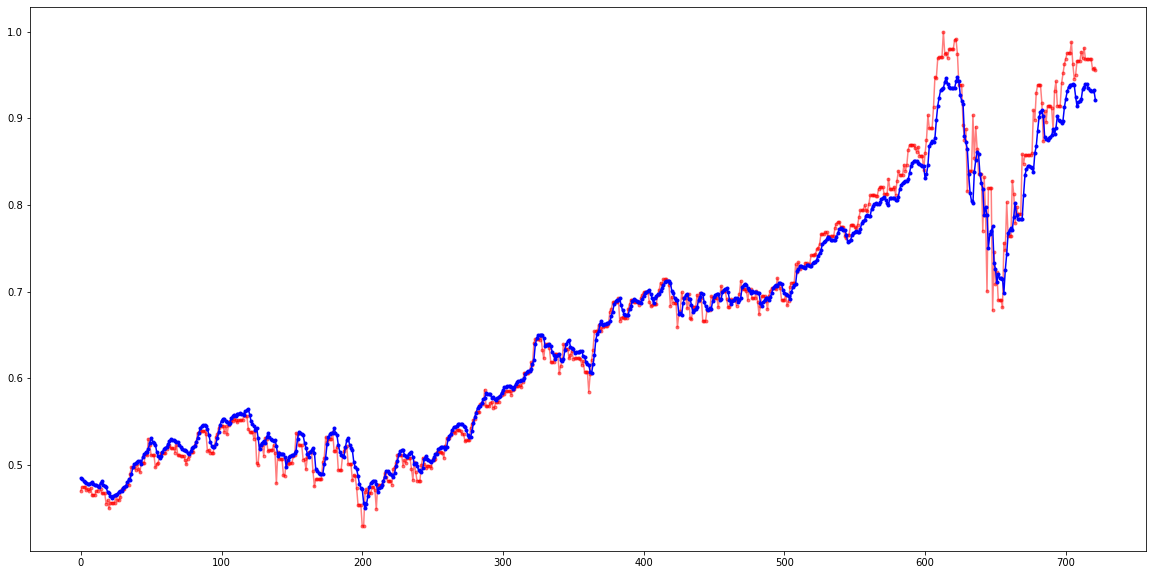

In [13]:
plt.figure(figsize=(20,10))
print("Model - 1")
plt.plot( y_test, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( y_pred[0], '.-', color='blue', label='Predicted values', alpha=1)

Model - 2


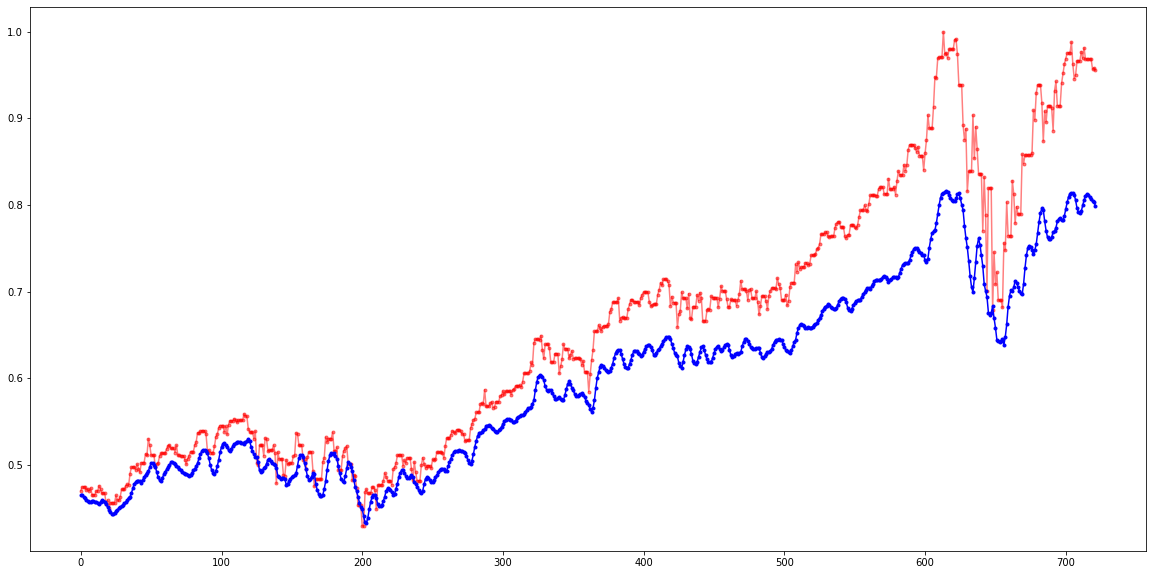

In [14]:
plt.figure(figsize=(20,10))
print("Model - 2")
plt.plot( y_test, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( y_pred[1], '.-', color='blue', label='Predicted values', alpha=1)

Model - 3


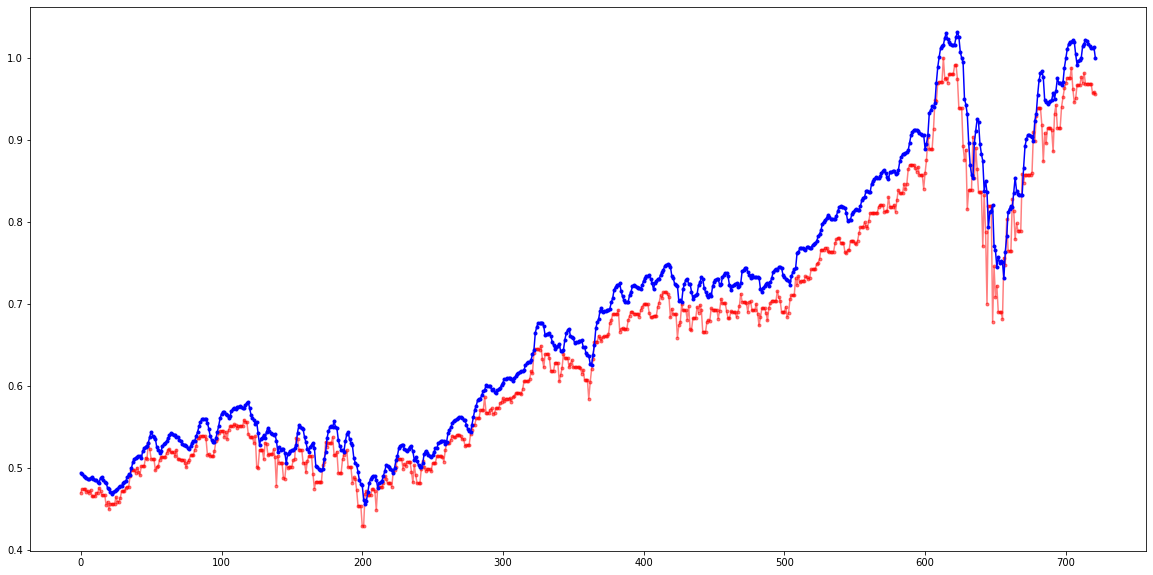

In [15]:
plt.figure(figsize=(20,10))
print("Model - 3")
plt.plot( y_test, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( y_pred[2], '.-', color='blue', label='Predicted values', alpha=1)

Model - 4


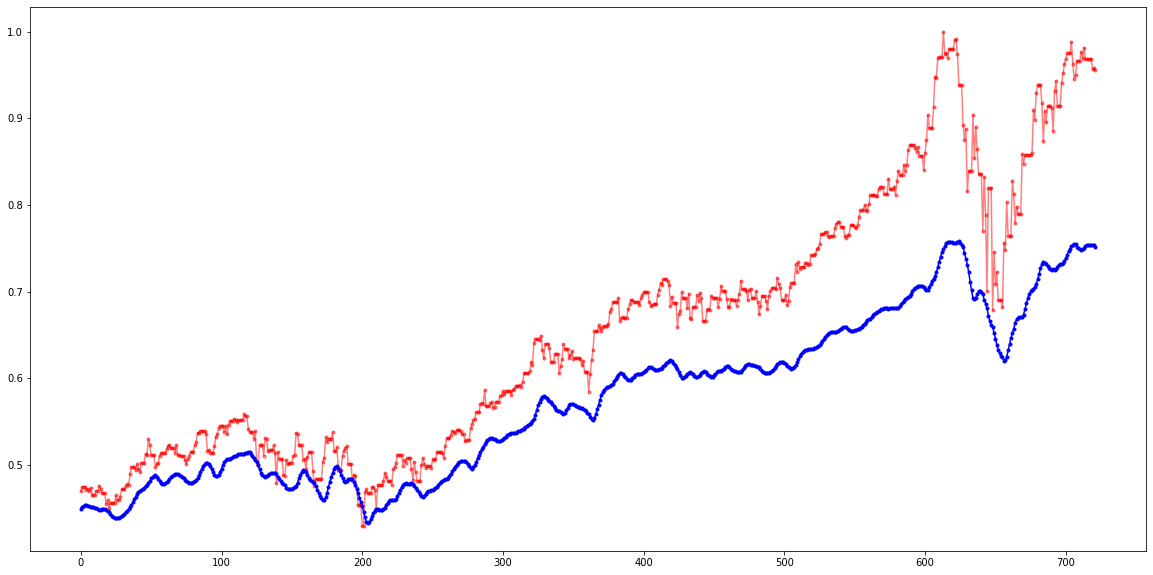

In [16]:
plt.figure(figsize=(20,10))
print("Model - 4")
plt.plot( y_test, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( y_pred[3], '.-', color='blue', label='Predicted values', alpha=1)

Model - 5


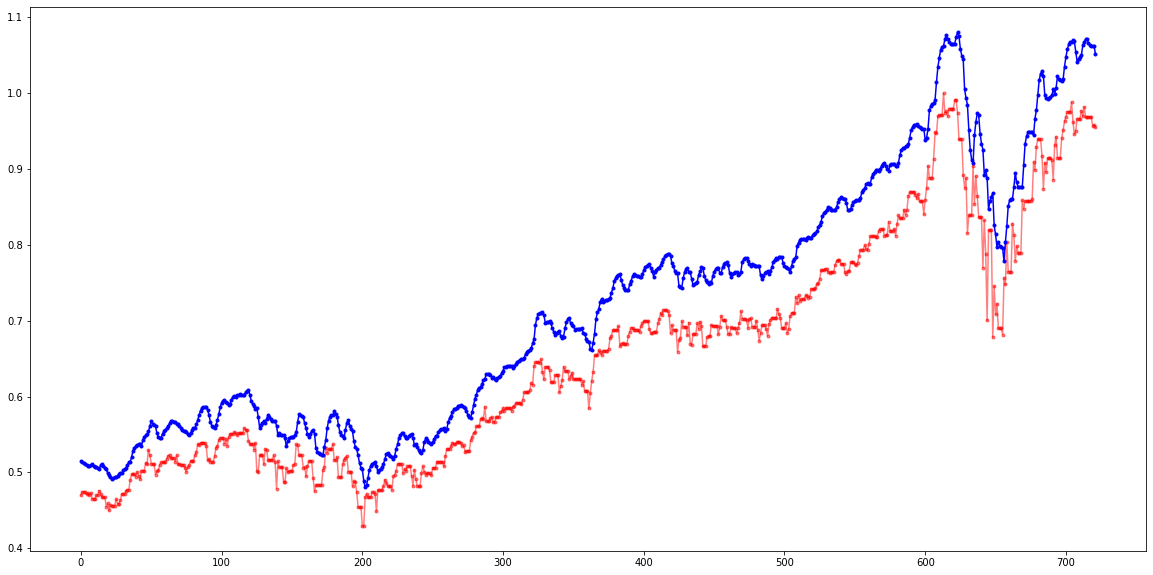

In [17]:
plt.figure(figsize=(20,10))
print("Model - 5")
plt.plot( y_test, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( y_pred[4], '.-', color='blue', label='Predicted values', alpha=1)

Model - 6


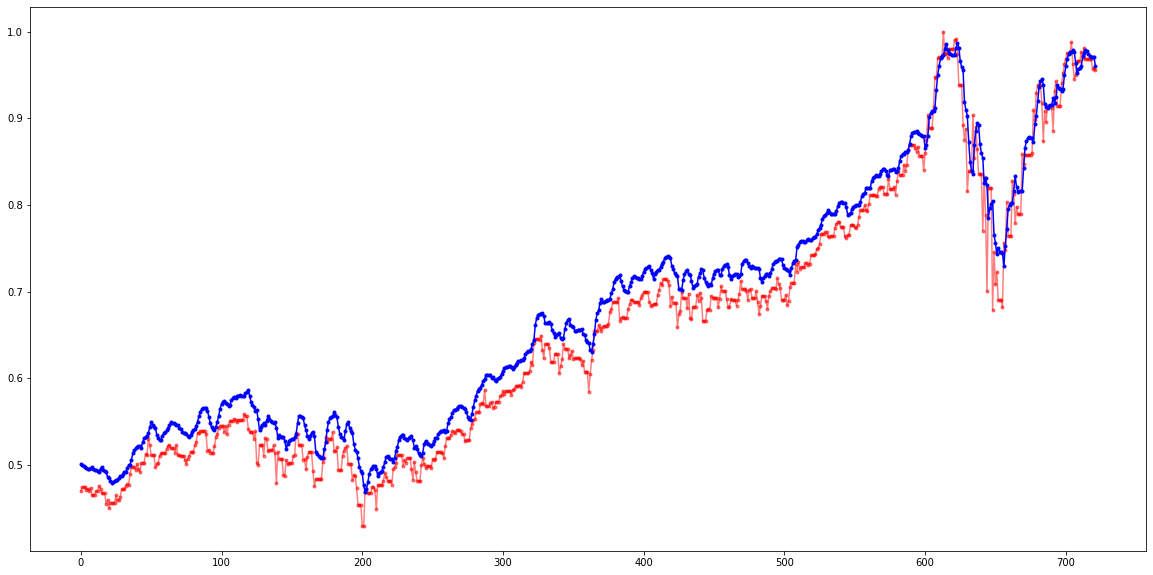

In [18]:
plt.figure(figsize=(20,10))
print("Model - 6")
plt.plot( y_test, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( y_pred[5], '.-', color='blue', label='Predicted values', alpha=1)

Model - 7


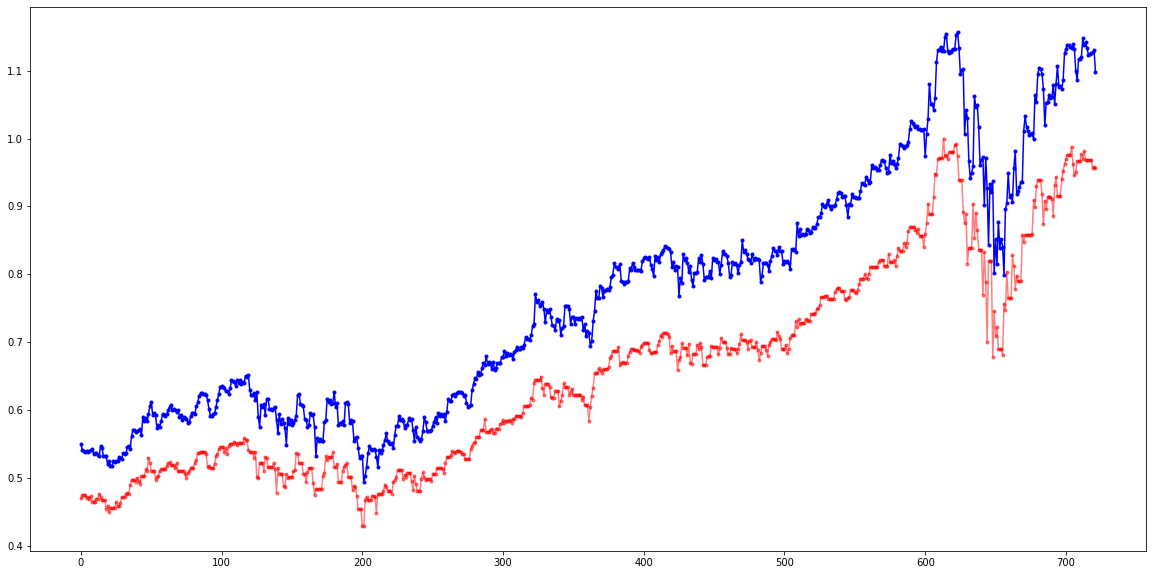

In [19]:
plt.figure(figsize=(20,10))
print("Model - 7")
plt.plot( y_test, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( y_pred[6], '.-', color='blue', label='Predicted values', alpha=1)

Model - 8


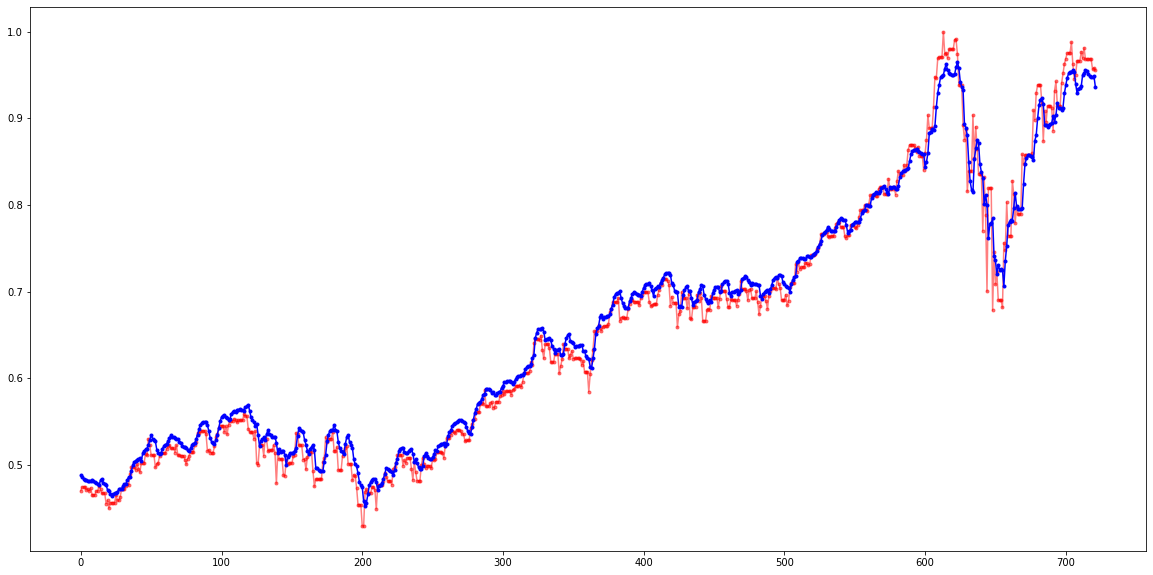

In [20]:
plt.figure(figsize=(20,10))
print("Model - 8")
plt.plot( y_test, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( y_pred[7], '.-', color='blue', label='Predicted values', alpha=1)

Model - 9


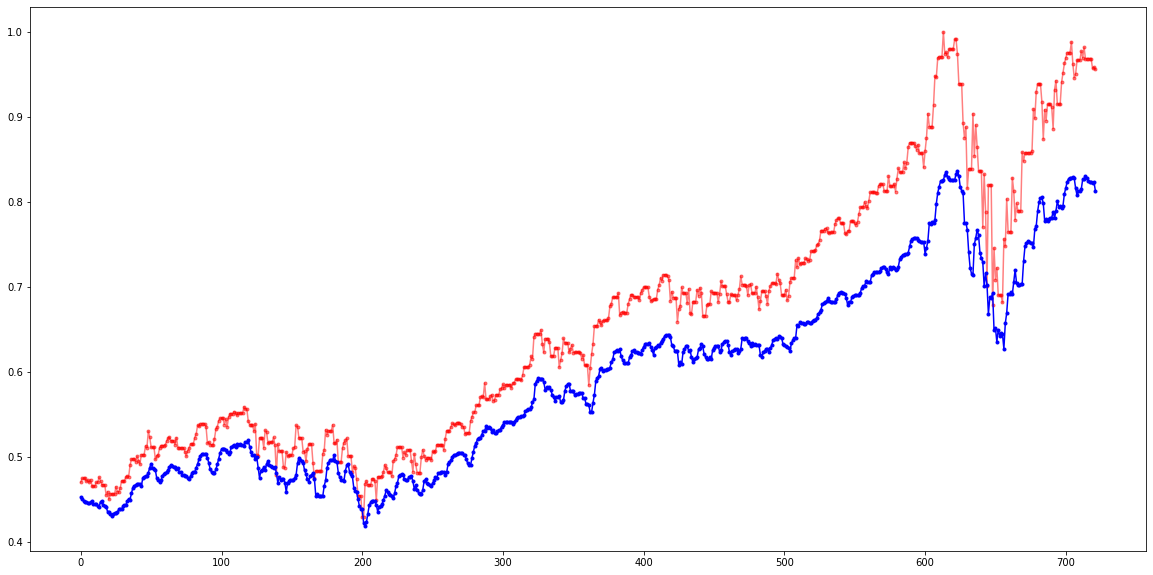

In [21]:
plt.figure(figsize=(20,10))
print("Model - 9")
plt.plot( y_test, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( y_pred[8], '.-', color='blue', label='Predicted values', alpha=1)

Model - 10


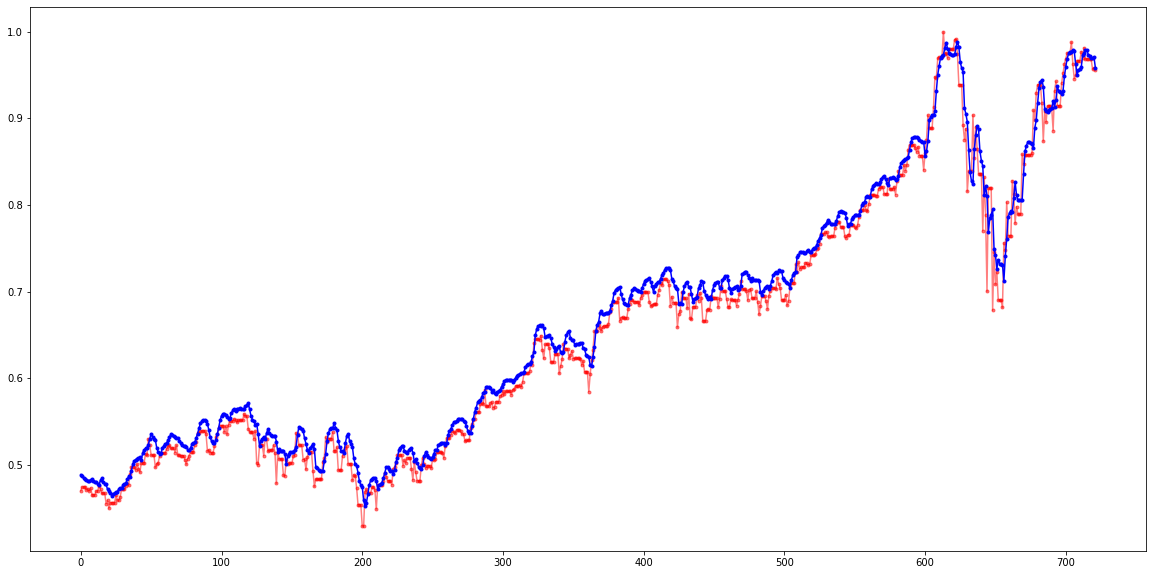

In [22]:
plt.figure(figsize=(20,10))
print("Model - 10")
plt.plot( y_test, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( y_pred[9], '.-', color='blue', label='Predicted values', alpha=1)

Model - 11


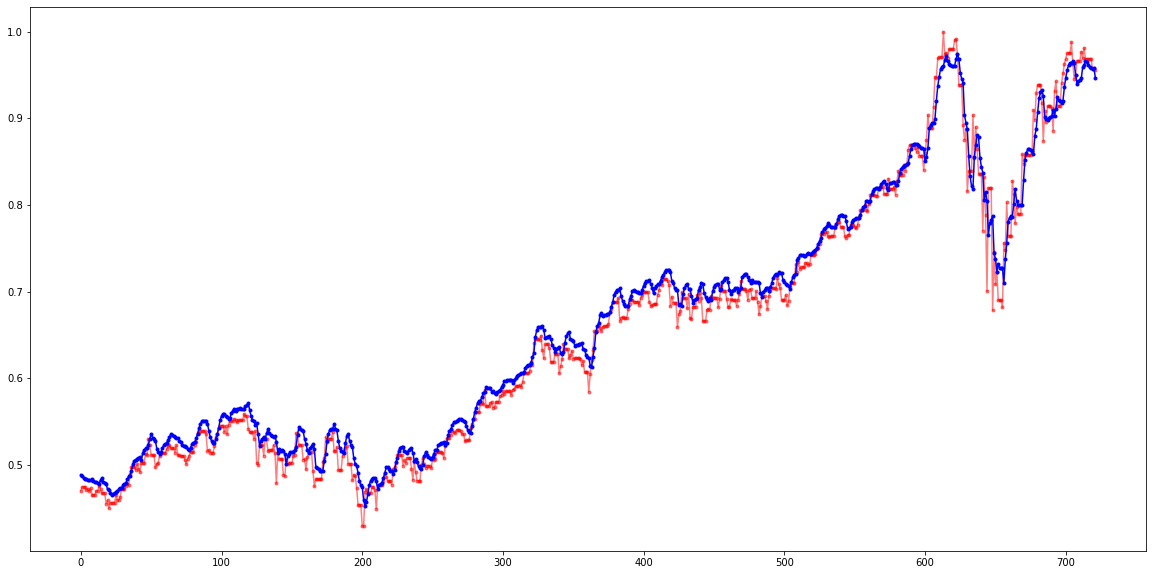

In [23]:
plt.figure(figsize=(20,10))
print("Model - 11")
plt.plot( y_test, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( y_pred[10], '.-', color='blue', label='Predicted values', alpha=1)

In [24]:
min_loss = 1
model_id = 1
for i in range(len(models)):
    if results[i]<min_loss:
        min_loss = results[i]
        model_id = i+1

In [25]:
results[model_id-1]

0.00032684040869201774

In [26]:
results = pd.DataFrame(results)

In [27]:
results.to_csv("without_sentiment.csv")